In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# df = pd.read_csv('/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 3/Data/weather_australia.csv')
df = pd.read_csv('/workspaces/DJS-compute-tasks/Task 3/Data/weather_australia.csv')

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes' : 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].astype(float)
df['RainToday'] = df['RainToday'].map({'Yes' : 1, 'No': 0})
df['RainToday'] = df['RainToday'].astype(float)

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
df.shape

(142193, 24)

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RISK_MM          float64
RainTomorrow     float64
dtype: object

In [8]:
dfint = df.select_dtypes(include='float64')

In [9]:
dfint = dfint.corr()

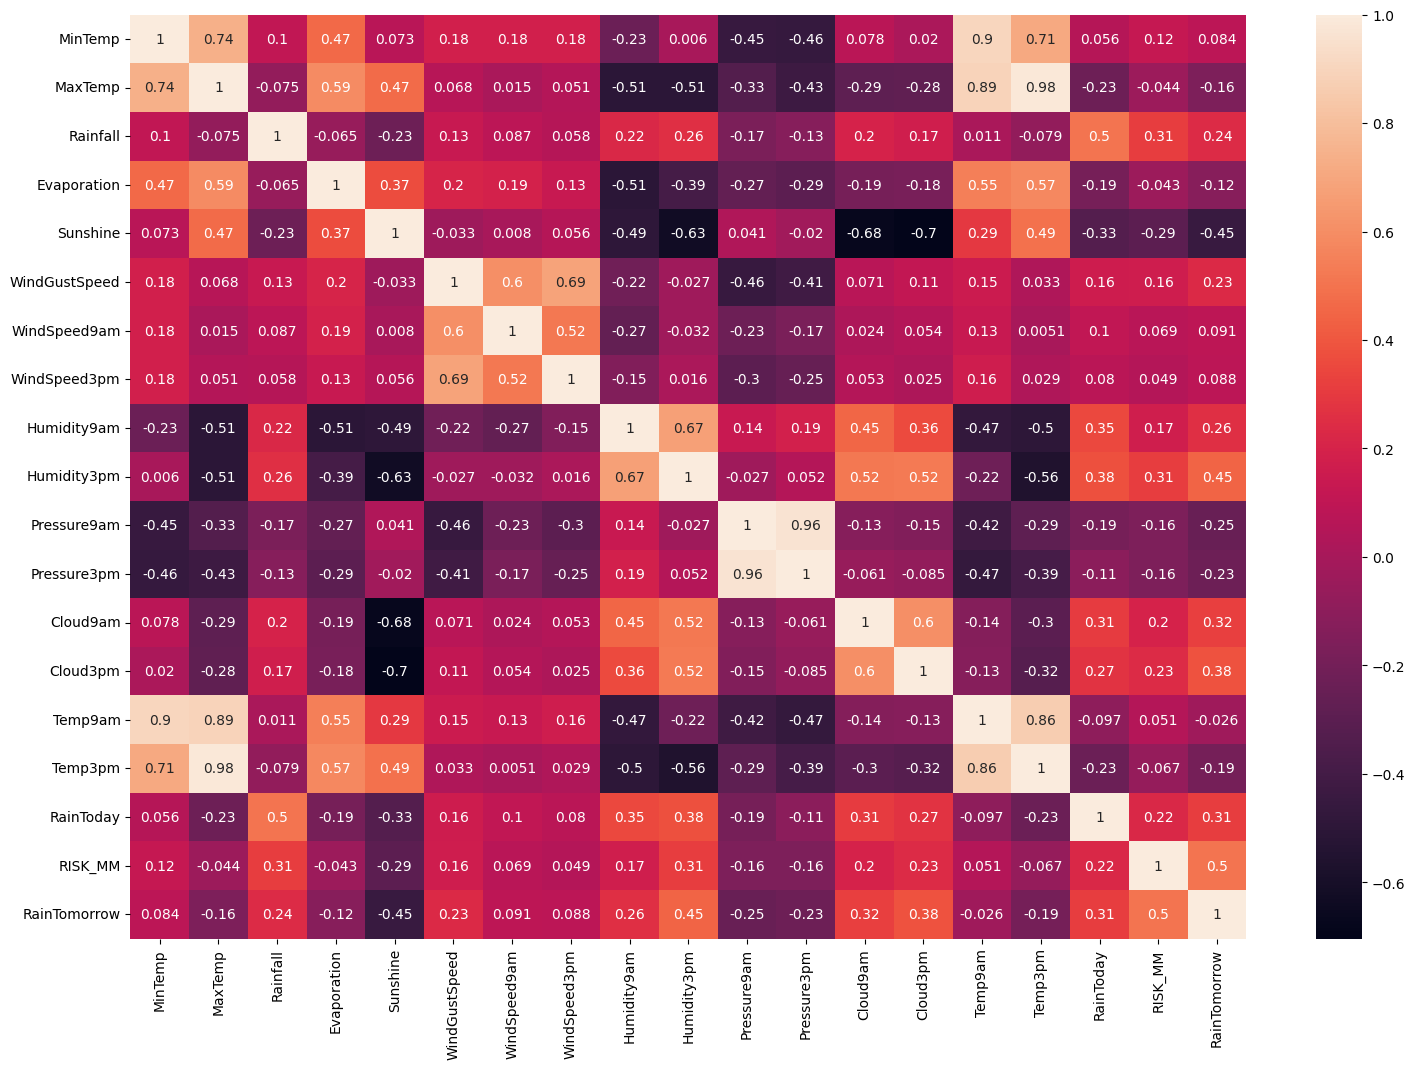

In [10]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(dfint, annot=True)
plt.show();

#### **Here it is seen that MinTemp, windspeed9am, windspeed3pm and temp9am have very very less correlation with our target variable, so these columns can be dropped safely for now.**

In [11]:
df1 = df.drop(columns=['MinTemp','WindSpeed9am','WindSpeed3pm','Temp9am' ])

In [12]:
df1.head()

,Date,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,22.9,0.6,NaN,NaN,W,44.0,W,WNW,71.0,22.0,1007.7,1007.1,8.0,NaN,21.8,0.0,0.0,0.0
1,2008-12-02,Albury,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,44.0,25.0,1010.6,1007.8,NaN,NaN,24.3,0.0,0.0,0.0
2,2008-12-03,Albury,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,38.0,30.0,1007.6,1008.7,NaN,2.0,23.2,0.0,0.0,0.0
3,2008-12-04,Albury,28.0,0.0,NaN,NaN,NE,24.0,SE,E,45.0,16.0,1017.6,1012.8,NaN,NaN,26.5,0.0,1.0,0.0
4,2008-12-05,Albury,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,82.0,33.0,1010.8,1006.0,7.0,8.0,29.7,0.0,0.2,0.0


#### **Checking and managing the null values.**

In [13]:
df1.isna().sum()

Date                 0
Location             0
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [14]:
df1.columns

Index(['Date', 'Location', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [15]:
columns_checking = ['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp3pm', 'RainToday']

def null_pecentage(df, columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_percentage = (df[col].isnull().sum() / len(df)) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"
    return result

null_percentage = null_pecentage(df, columns_checking)

for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")
    

MaxTemp: 0.23%
Rainfall: 0.99%
Evaporation: 42.79%
Sunshine: 47.69%
WindGustDir: 6.56%
WindGustSpeed: 6.52%
WindDir9am: 7.04%
WindDir3pm: 2.66%
Humidity9am: 1.25%
Humidity3pm: 2.54%
Pressure9am: 9.86%
Pressure3pm: 9.83%
Cloud9am: 37.74%
Cloud3pm: 40.15%
Temp3pm: 1.92%
RainToday: 0.99%


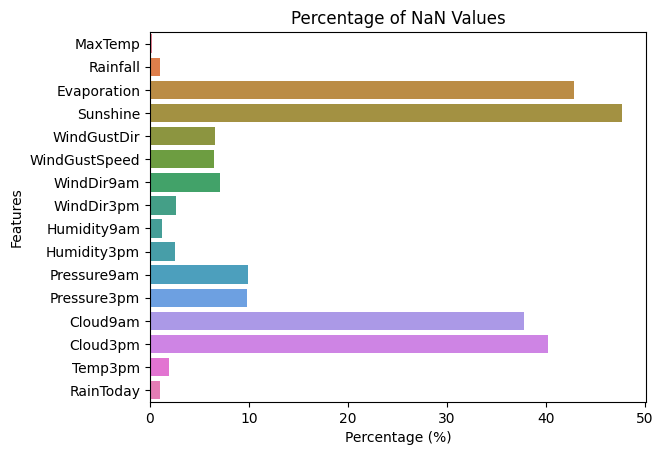

In [16]:
sns.barplot(data=null_percentage, x=null_percentage.values(), y=null_percentage.keys(),  hue=null_percentage.keys()).set(title="Percentage of NaN Values", xlabel="Percentage (%)", ylabel="Features")
plt.show()

In [17]:
df1.shape

(142193, 20)

In [18]:
df1.head()

,Date,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,22.9,0.6,NaN,NaN,W,44.0,W,WNW,71.0,22.0,1007.7,1007.1,8.0,NaN,21.8,0.0,0.0,0.0
1,2008-12-02,Albury,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,44.0,25.0,1010.6,1007.8,NaN,NaN,24.3,0.0,0.0,0.0
2,2008-12-03,Albury,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,38.0,30.0,1007.6,1008.7,NaN,2.0,23.2,0.0,0.0,0.0
3,2008-12-04,Albury,28.0,0.0,NaN,NaN,NE,24.0,SE,E,45.0,16.0,1017.6,1012.8,NaN,NaN,26.5,0.0,1.0,0.0
4,2008-12-05,Albury,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,82.0,33.0,1010.8,1006.0,7.0,8.0,29.7,0.0,0.2,0.0


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

In [20]:
df1['RainTomorrow'] = df['RainTomorrow']

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df1[columns_to_encode] = df1[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))


In [22]:
df1.head()

,Date,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,2,22.9,0.6,NaN,NaN,13,44.0,13,14,71.0,22.0,1007.7,1007.1,8.0,NaN,21.8,0.0,0.0,0.0
1,2008-12-02,2,25.1,0.0,NaN,NaN,14,44.0,6,15,44.0,25.0,1010.6,1007.8,NaN,NaN,24.3,0.0,0.0,0.0
2,2008-12-03,2,25.7,0.0,NaN,NaN,15,46.0,13,15,38.0,30.0,1007.6,1008.7,NaN,2.0,23.2,0.0,0.0,0.0
3,2008-12-04,2,28.0,0.0,NaN,NaN,4,24.0,9,0,45.0,16.0,1017.6,1012.8,NaN,NaN,26.5,0.0,1.0,0.0
4,2008-12-05,2,32.3,1.0,NaN,NaN,13,41.0,1,7,82.0,33.0,1010.8,1006.0,7.0,8.0,29.7,0.0,0.2,0.0


In [23]:
X = df1.drop(columns= ['Date','RainTomorrow'], axis=1)
y = df1['RainTomorrow']
print(len(X))
print(len(y))
X.head()

142193
142193


,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RISK_MM
0,2,22.9,0.6,NaN,NaN,13,44.0,13,14,71.0,22.0,1007.7,1007.1,8.0,NaN,21.8,0.0,0.0
1,2,25.1,0.0,NaN,NaN,14,44.0,6,15,44.0,25.0,1010.6,1007.8,NaN,NaN,24.3,0.0,0.0
2,2,25.7,0.0,NaN,NaN,15,46.0,13,15,38.0,30.0,1007.6,1008.7,NaN,2.0,23.2,0.0,0.0
3,2,28.0,0.0,NaN,NaN,4,24.0,9,0,45.0,16.0,1017.6,1012.8,NaN,NaN,26.5,0.0,1.0
4,2,32.3,1.0,NaN,NaN,13,41.0,1,7,82.0,33.0,1010.8,1006.0,7.0,8.0,29.7,0.0,0.2


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)


: 

In [25]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
scaler = StandardScaler()
X_train_imputed_scaled = scaler.fit_transform(X_train_imputed)
X_test_imputed_scaled = scaler.transform(X_test_imputed)


In [26]:
lr.fit(X_train_imputed_scaled, y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred = lr.predict(X_test_imputed_scaled)


In [28]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     44241
         1.0       1.00      1.00      1.00     12637

    accuracy                           1.00     56878
   macro avg       1.00      1.00      1.00     56878
weighted avg       1.00      1.00      1.00     56878



Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     44241
         1.0       1.00      1.00      1.00     12637

    accuracy                           1.00     56878
   macro avg       1.00      1.00      1.00     56878
weighted avg       1.00      1.00      1.00     56878

Confusion Matrix:
[[44241     0]
 [   62 12575]]


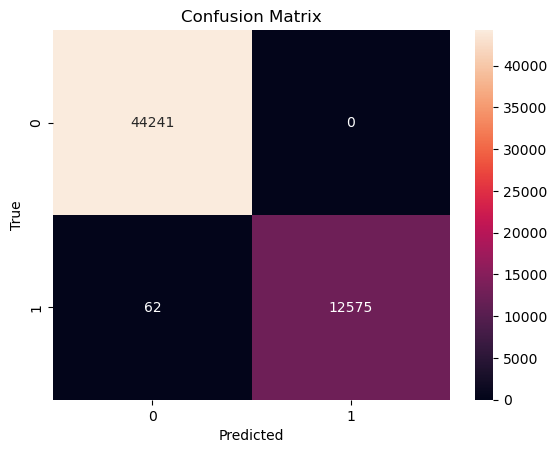

In [29]:
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
y_test.value_counts()

RainTomorrow
0.0    44241
1.0    12637
Name: count, dtype: int64

In [47]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.svm import SVC
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

# # Set up the parameter grid for SVC
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.01, 0.1]
# }

# # Initialize the SVC model
# svc = SVC()

# # Set up GridSearchCV
# grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1)

# # Fit the model using GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_svc = grid_search.best_estimator_

# # Predict using the best model
# y_pred = best_svc.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Plot the confusion matrix
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 